In [1]:

from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt


In [2]:

from cmass.survey.tools import xyz_to_sky

In [3]:

from astropy import cosmology

In [8]:
from summarizer.two_point import TwoPCF, Pk, Mk
from summarizer.data import BoxCatalogue, SurveyCatalogue 
#from summarizer.wavelet import WST
from summarizer.environment import DensitySplit


In [9]:
%load_ext autoreload
%autoreload 2

In [10]:
cat = BoxCatalogue.from_quijote(
    node=0,
    redshift=0.5,
    n_halos=10_000,
    path_to_lhcs= Path('/n/holystore01/LABS/itc_lab/Users/ccuestalazaro/quijote/latin_hypercube'),
)

ModuleNotFoundError: No module named 'readfof'

In [ ]:

galaxies_ra_dec_z = xyz_to_sky(
    cat.galaxies_pos, 
    np.zeros_like(cat.galaxies_pos), 
    cat.cosmology,
) 
randoms_pos = np.random.uniform(0, cat.boxsize, size=(10*len(cat), 3))

randoms_ra_dec_z = xyz_to_sky(
    randoms_pos, np.zeros_like(randoms_pos), cosmo= cat.cosmology,
)

In [ ]:

survey_cat = SurveyCatalogue(
    galaxies_ra_dec_z = galaxies_ra_dec_z,
    randoms_ra_dec_z= randoms_ra_dec_z,
    redshift = 0.5,
    fiducial_cosmology= cosmology.Planck15,
)

In [ ]:

r_bins = np.logspace(-1, np.log10(150.), 50)
mu_bins = np.linspace(-1, 1, 120)
tpcf_summarizer = TwoPCF(r_bins=r_bins, mu_bins=mu_bins,ells=[0,2])
tpcf = tpcf_summarizer(cat, return_dataset=True)
tpcf_survey = tpcf_summarizer(survey_cat, return_dataset=True,)


Text(0, 0.5, 'TPCF')

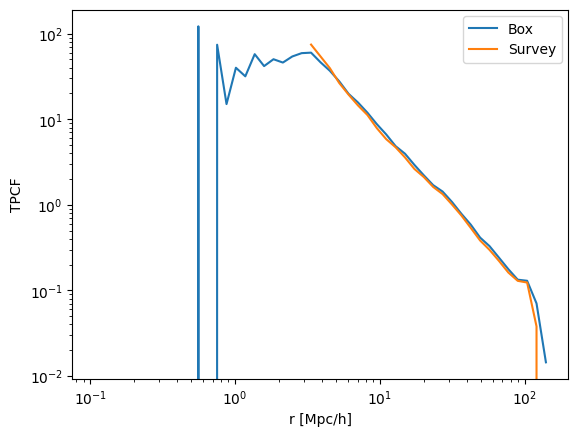

In [ ]:
plt.loglog(tpcf.r, tpcf.sel(ells=0).values,label='Box')
plt.loglog(tpcf_survey.r, tpcf_survey.sel(ells=0).values,label='Survey')
plt.legend()
plt.xlabel('r [Mpc/h]')
plt.ylabel('TPCF')

In [ ]:
pk_summarizer = Pk(n_mesh=cat.n_mesh, ells=[0,2],)
pk = pk_summarizer(cat, return_dataset=True,)
pk_survey = pk_summarizer(survey_cat, return_dataset=True,)

In [ ]:
plt.loglog(pk.k, pk.sel(ells=0).values,label='Box')
plt.loglog(pk_survey.k, pk_survey.sel(ells=0).values,label='Survey')
plt.legend()
plt.xlabel('k')
plt.ylabel('Pk')

In [5]:
marked_pk_summarizer = Mk(
    smoothing_radius=30.,
    n_mesh=cat.n_mesh, 
    ells=[0,2],
)
mk = marked_pk_summarizer(cat, return_dataset=True,)
mk_survey = marked_pk_summarizer(survey_cat, return_dataset=True,)

NameError: name 'Mk' is not defined

In [ ]:
plt.loglog(mk.k, mk.sel(ells=0).values,label='Box')
plt.loglog(mk_survey.k, mk_survey.sel(ells=0).values,label='Survey')
plt.legend()
plt.xlabel('k')
plt.ylabel('Mk')

In [ ]:
wst_summarizer = WST(n_mesh=cat.n_mesh,)
wst = wst_summarizer(cat, return_dataset=True,)
wst_survey = wst_summarizer(survey_cat, return_dataset=True,)

In [ ]:
plt.plot(wst.values,label='Box')
plt.plot(wst_survey.values,label='Survey')
plt.legend()
plt.xlabel('coefficient')
plt.ylabel('WST')

In [ ]:

r_bins = np.logspace(-1, np.log10(150.), 50)
mu_bins = np.linspace(-1, 1, 120)
ds_summarizer = DensitySplit(
    n_mesh=cat.n_mesh,
    r_bins=r_bins,
    mu_bins=mu_bins,
    ells=[0,2],
)
ds = ds_summarizer(cat, return_dataset=True,)
ds_survey = ds_summarizer(survey_cat, return_dataset=True,)

In [ ]:
for quantile in [0,1,4,5]:
    c = plt.plot(ds.r, ds.r**2*ds.sel(ells=0, quantile=quantile,).values,label='Box' if quantile == 0 else None,)
    plt.plot(ds_survey.r, ds_survey.r**2*ds_survey.sel(ells=0, quantile=quantile,).values,label='Survey' if quantile == 0 else None, color=c[0].get_color(), linestyle='dashed')
plt.legend()
plt.xlabel('r [Mpc/h]')
plt.ylabel('TPCF')